In [34]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/brain-tumor-detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write 




/kaggle/input/brain-tumor-detection/no/no26.jpg
/kaggle/input/brain-tumor-detection/no/no979.jpg
/kaggle/input/brain-tumor-detection/no/no598.jpg
/kaggle/input/brain-tumor-detection/no/no141.jpg
/kaggle/input/brain-tumor-detection/no/no715.jpg
/kaggle/input/brain-tumor-detection/no/no122.jpg
/kaggle/input/brain-tumor-detection/no/no457.jpg
/kaggle/input/brain-tumor-detection/no/no895.jpg
/kaggle/input/brain-tumor-detection/no/no446.jpg
/kaggle/input/brain-tumor-detection/no/no395.jpg
/kaggle/input/brain-tumor-detection/no/no89.jpg
/kaggle/input/brain-tumor-detection/no/no632.jpg
/kaggle/input/brain-tumor-detection/no/no420.jpg
/kaggle/input/brain-tumor-detection/no/no634.jpg
/kaggle/input/brain-tumor-detection/no/no1142.jpg
/kaggle/input/brain-tumor-detection/no/no473.jpg
/kaggle/input/brain-tumor-detection/no/no1244.jpg
/kaggle/input/brain-tumor-detection/no/no474.jpg
/kaggle/input/brain-tumor-detection/no/no706.jpg
/kaggle/input/brain-tumor-detection/no/no161.jpg
/kaggle/input/brain-

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense 
from sklearn.metrics import confusion_matrix , classification_report,ConfusionMatrixDisplay
from tensorflow.keras import models,layers

In [36]:
image_dir='/kaggle/input/brain-tumor-detection/'
no_tumor_images=os.listdir(image_dir+ '/no')
yes_tumor_images=os.listdir(image_dir+ '/yes')
print('The length of no tumor images is',len(no_tumor_images))
print('The length of yes tumor images is',len(yes_tumor_images))

The length of no tumor images is 1500
The length of yes tumor images is 1500


In [37]:
dataset=[]
label=[]

In [38]:
#loop for reading no tumor images
for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_dir+'no/'+image_name)
        #convert images to RGB format
        image=Image.fromarray(image,'RGB')
        image=image.resize((128,128))
        #append images as numpy array to dataset list
        dataset.append(np.array(image))
        #append 0 label list(label for no tumor)
        label.append(0)

In [39]:
#the same
for i ,image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_dir+'yes/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((128,128))
        dataset.append(np.array(image))
        label.append(1)

In [40]:
dataset=np.array(dataset)
label = np.array(label)

print('Dataset: ',len(dataset))
print('Label: ',len(label))

Dataset:  3000
Label:  3000


In [41]:
x_train,x_test,y_train,y_test=train_test_split(dataset,label,test_size=.2)

In [42]:
x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)

In [43]:
cnn=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(.5),
    layers.Dense(1,activation='sigmoid')
])
cnn.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [44]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
75/75 [==============================] - 19s 241ms/step - loss: 0.4642 - accuracy: 0.7808
Epoch 2/5
75/75 [==============================] - 18s 235ms/step - loss: 0.2173 - accuracy: 0.9183
Epoch 3/5
75/75 [==============================] - 19s 249ms/step - loss: 0.1004 - accuracy: 0.9733
Epoch 4/5
75/75 [==============================] - 19s 252ms/step - loss: 0.0627 - accuracy: 0.9871
Epoch 5/5
75/75 [==============================] - 18s 240ms/step - loss: 0.0382 - accuracy: 0.9879


In [45]:
cnn.evaluate(x_test,y_test)

19/19 [==============================] - 1s 64ms/step - loss: 0.0644 - accuracy: 0.9733


[0.0643649622797966, 0.9733333587646484]

In [46]:
y_pred=cnn.predict(x_test)
y_pred = cnn.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
print('classification Report\n',classification_report(y_test,y_pred))

19/19 [==============================] - 1s 63ms/step
classification Report
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       299
           1       0.97      0.98      0.97       301

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



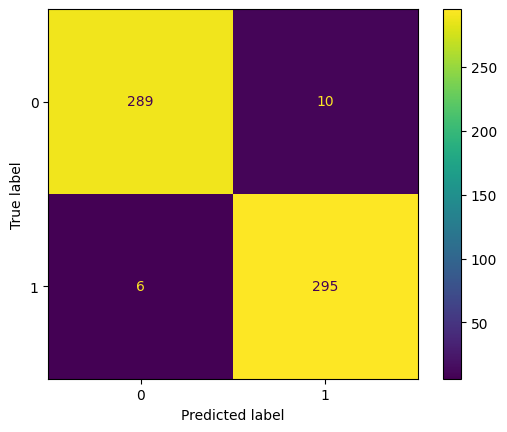

In [47]:
cm = confusion_matrix(y_test, y_pred)
display=ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [48]:
cnn.save('brain tumor detection.h5')

In [49]:
model = load_model('/kaggle/working/brain tumor detection.h5')

In [50]:
def make_prediction(img):
    img=cv2.imread(img)
    img=Image.fromarray(img)
    img=img.resize((128,128))
    img=np.array(img)
    input_img = np.expand_dims(img, axis=0)
    plt.imshow(img)
    plt.show()
    res = model.predict(input_img)
    if res:
        print("Tumor Detected")
    else:
        print("No Tumor")

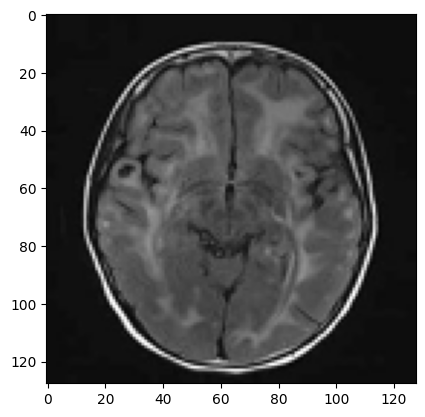

1/1 [==============================] - 0s 65ms/step
Tumor Detected


In [51]:
make_prediction('/kaggle/input/brain-tumor-detection/pred/pred17.jpg')